In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Data Setting:

In [146]:
df = pd.read_csv('cardio_train.csv',sep=",")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [147]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 13)


In [148]:
df.insert(4, 'bmi', round((df['weight']/(df['height']/100)**2), 2))     # insert BMI
df['age'] = round(df['age']/365.25,2) #convert age to years
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)  #remove impossible ap values
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True) 

In [149]:
df.info()
df.describe() #show mean of everything

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68677 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68677 non-null  int64  
 1   age          68677 non-null  float64
 2   gender       68677 non-null  int64  
 3   height       68677 non-null  int64  
 4   bmi          68677 non-null  float64
 5   weight       68677 non-null  float64
 6   ap_hi        68677 non-null  int64  
 7   ap_lo        68677 non-null  int64  
 8   cholesterol  68677 non-null  int64  
 9   gluc         68677 non-null  int64  
 10  smoke        68677 non-null  int64  
 11  alco         68677 non-null  int64  
 12  active       68677 non-null  int64  
 13  cardio       68677 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 7.9 MB


,id,age,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000,68677.000000
mean,49973.399435,53.289768,1.348807,164.407444,27.453050,74.098343,126.598963,81.372381,1.364751,1.226044,0.088035,0.053613,0.803311,0.494867
std,28845.356754,6.757043,0.476596,7.934029,5.206728,14.201382,16.711287,9.640222,0.679070,0.572041,0.283348,0.225255,0.397498,0.499977
min,0.000000,29.560000,1.000000,100.000000,15.010000,28.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25002.000000,48.340000,1.000000,159.000000,23.880000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50020.000000,53.940000,1.000000,165.000000,26.350000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74867.000000,58.380000,2.000000,170.000000,30.120000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.920000,2.000000,207.000000,60.000000,200.000000,220.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Analysis:

Text(0.5, 1.0, 'Cardio percentage')

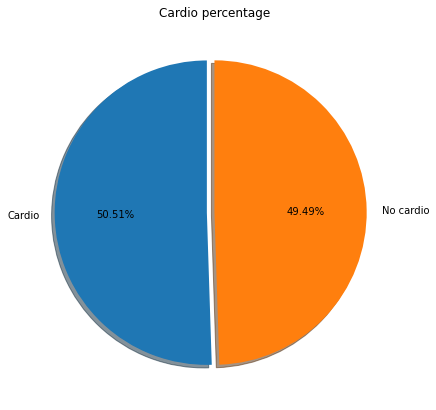

In [150]:
fig = plt.figure(figsize =(10, 7))
plt.tight_layout(pad=10)
plt.pie(x=df['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.2f%%', shadow=True, startangle=90, explode=(0.05,0.0))
plt.title('Cardio percentage')

                   id       age    gender    height       bmi    weight  \
id           1.000000  0.003422  0.003043 -0.003170 -0.000420 -0.001975   
age          0.003422  1.000000 -0.023054 -0.084753  0.102475  0.055329   
gender       0.003043 -0.023054  1.000000  0.514793 -0.110324  0.157875   
height      -0.003170 -0.084753  0.514793  1.000000 -0.210336  0.311109   
bmi         -0.000420  0.102475 -0.110324 -0.210336  1.000000  0.857715   
weight      -0.001975  0.055329  0.157875  0.311109  0.857715  1.000000   
ap_hi        0.000829  0.209188  0.061193  0.019164  0.265312  0.269346   
ap_lo       -0.001333  0.153351  0.066918  0.037043  0.236473  0.250224   
cholesterol  0.005948  0.155524 -0.036560 -0.054257  0.173122  0.142674   
gluc         0.002349  0.099245 -0.021090 -0.020582  0.120438  0.108169   
smoke       -0.003336 -0.047864  0.338802  0.194498 -0.034181  0.067211   
alco         0.000634 -0.029083  0.170994  0.098038  0.017390  0.068443   
active       0.003823 -0.

<AxesSubplot:>

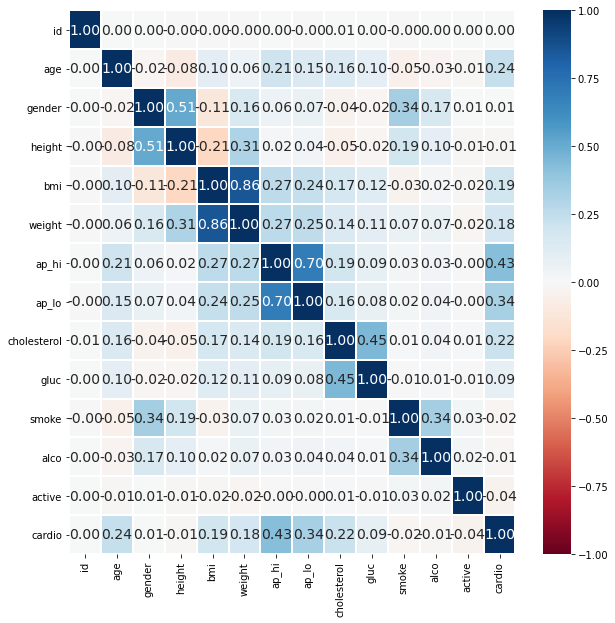

In [151]:
# Correlation Matrix
print(df.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(df.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")


<AxesSubplot:xlabel='ap_lo', ylabel='cardio'>

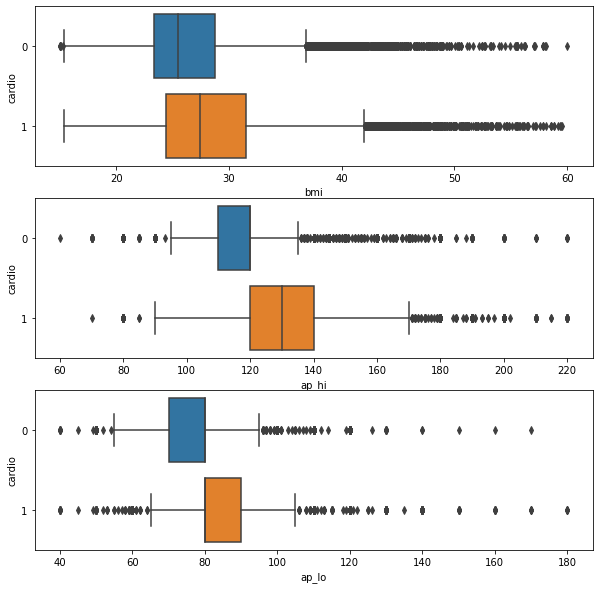

In [152]:
#boxplot of three variables(bmi,ap_hi,ap_lo) to cardio
f, axes = plt.subplots(3, 1, figsize=(10, 10))
sb.boxplot(x = "bmi", y = "cardio", data = df, orient = "h", ax = axes[0])
sb.boxplot(x = "ap_hi", y = "cardio", data = df, orient = "h", ax = axes[1])
sb.boxplot(x = "ap_lo", y = "cardio", data = df, orient = "h", ax = axes[2])

#Conclusion: the higher ap_hi, the more likely to get cardio disease

## Machine Learning: Classification Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5820730971647287

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5854688410017472



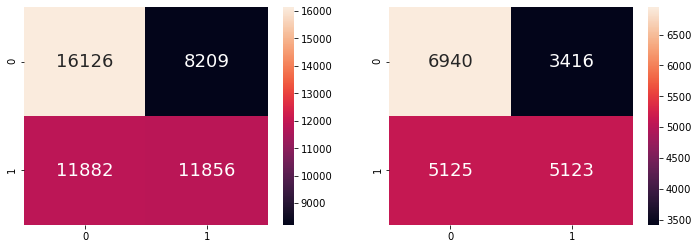

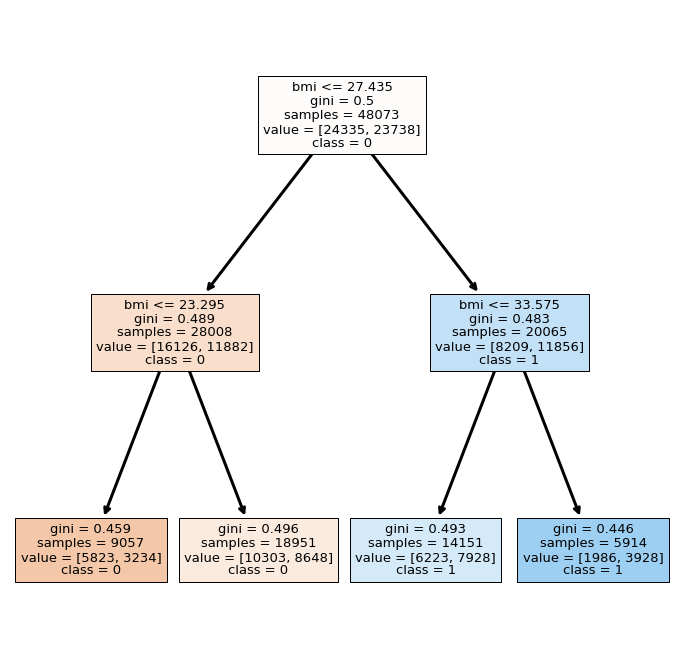

In [153]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(df['cardio']) #0/1
X = pd.DataFrame(df['bmi'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()




# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7131861959935931

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7111240535818287



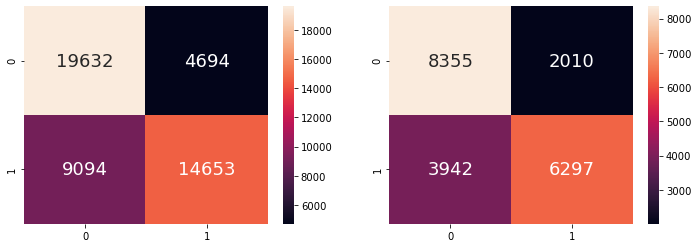

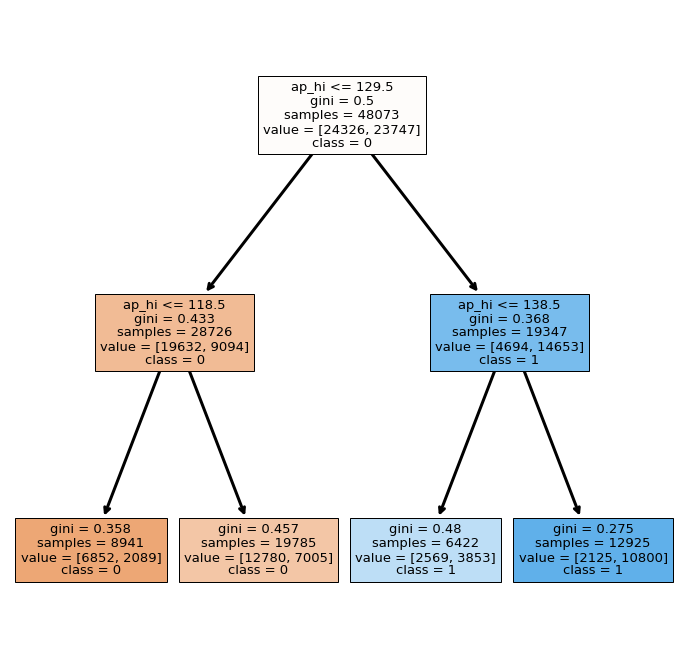

In [154]:
# Extract Response and Predictors
y = pd.DataFrame(df['cardio']) #0/1
X = pd.DataFrame(df['ap_hi'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()




# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6602042726686498

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6545331003688604



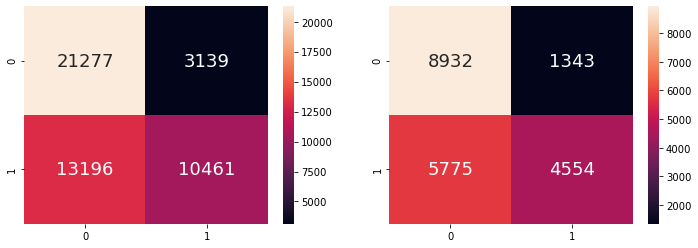

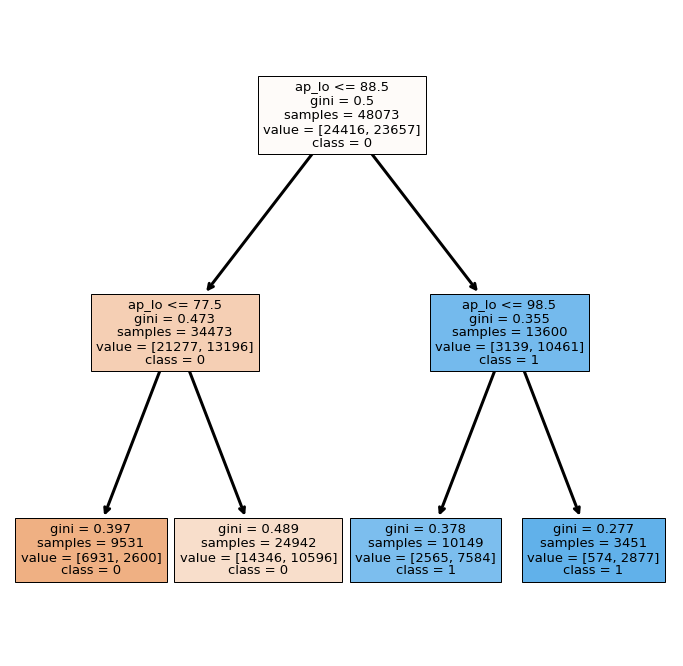

In [155]:
# Extract Response and Predictors
y = pd.DataFrame(df['cardio']) #0/1
X = pd.DataFrame(df['ap_lo'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()




# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7127574892733026

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7119976703552708



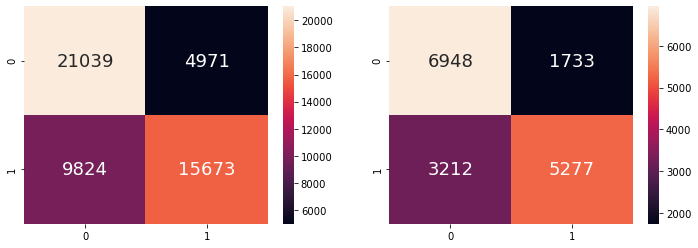

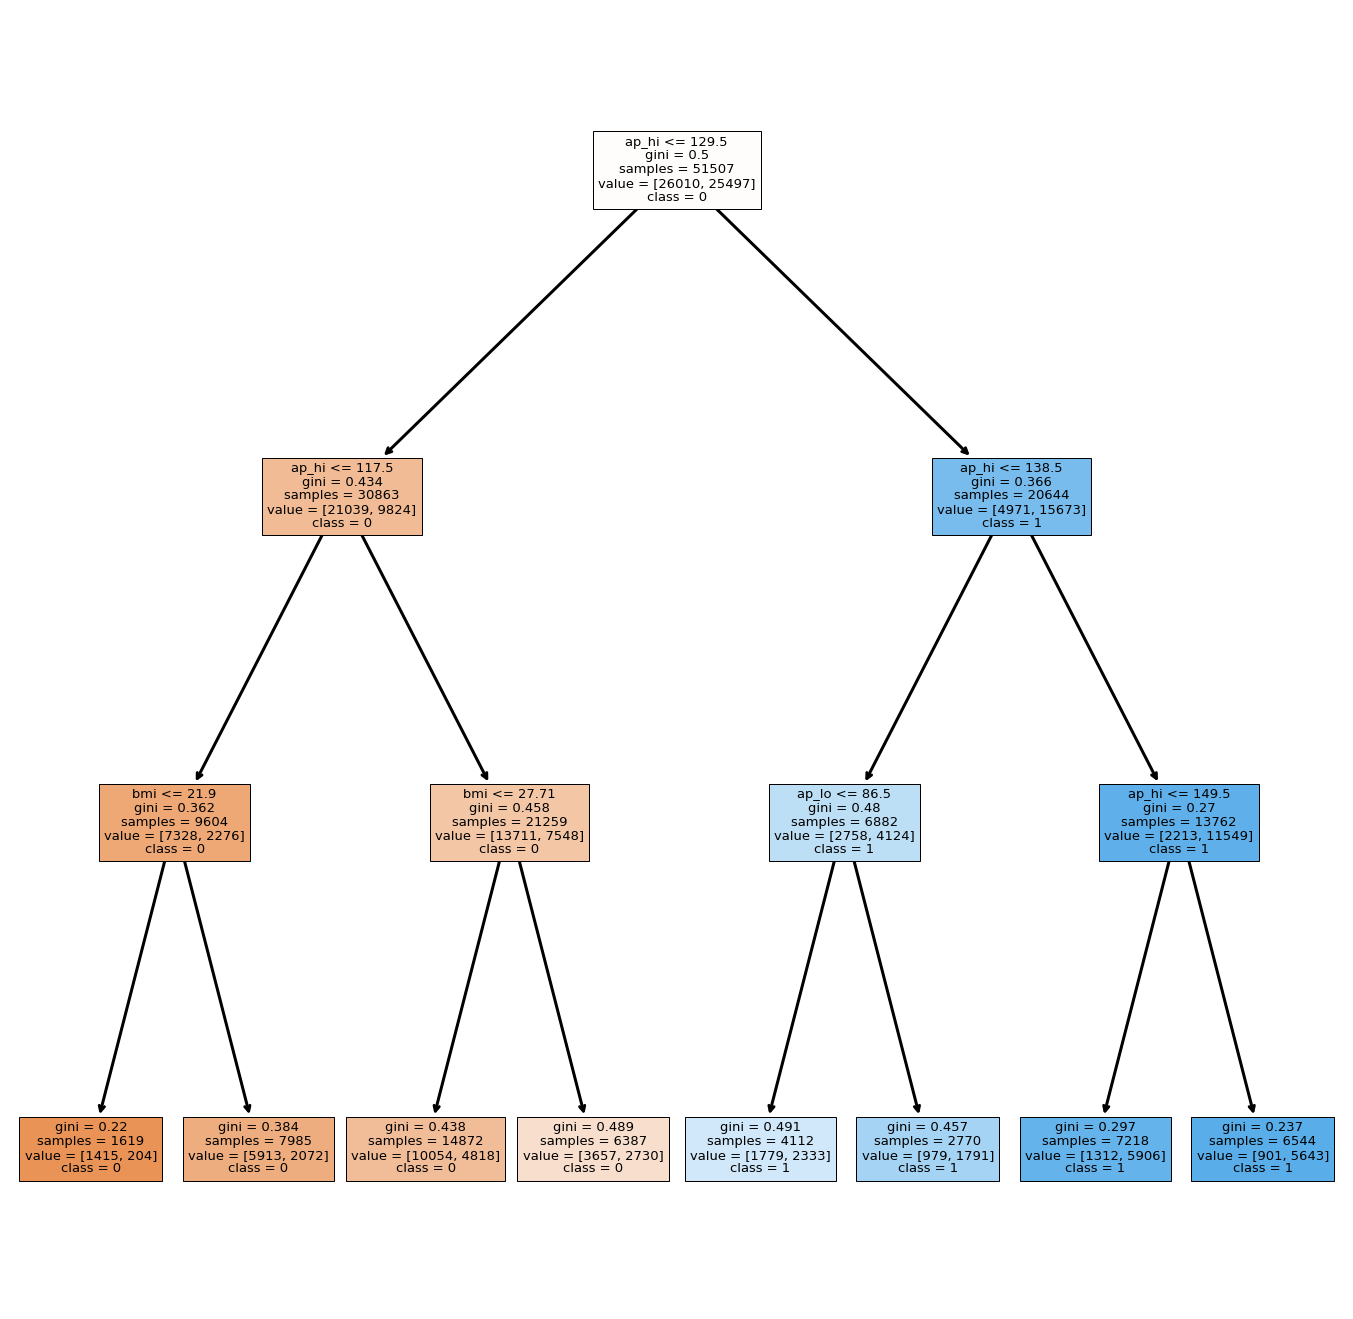

In [156]:
#Decision Tree(Muti - variables)
# Import essential models and functions from sklearn

# Extract Response and Predictors
predictors = ["bmi", "ap_hi", "ap_lo"]

y = pd.DataFrame(df['cardio'])
X = pd.DataFrame(df[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24,24))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()


## Random Forest Classification:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7118132839639715

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.712240341681227



<AxesSubplot:>

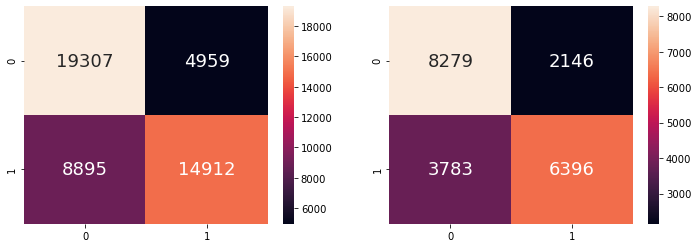

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


predictors = ["bmi", "ap_hi", "ap_lo"]

y = df.iloc[:, 13].values
X = pd.DataFrame(df[predictors]) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5,max_depth=3)
classifier.fit(X_train, y_train)



# Predict Response corresponding to Predictors
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

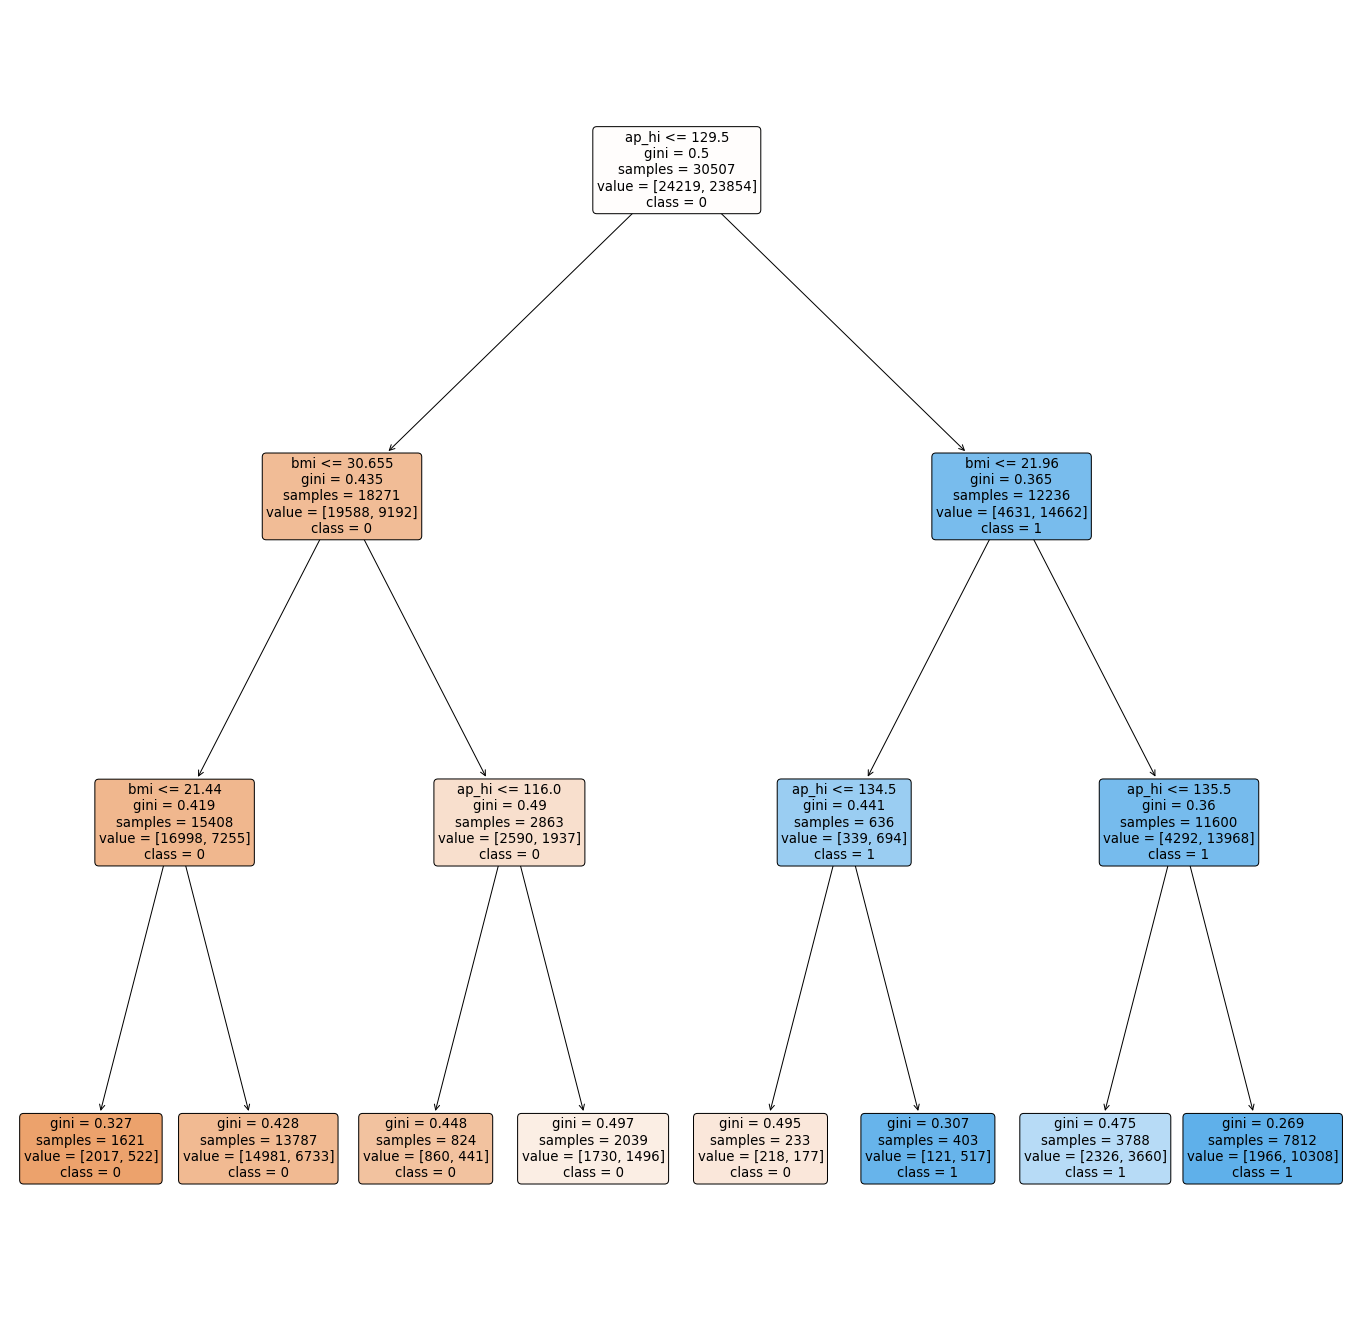

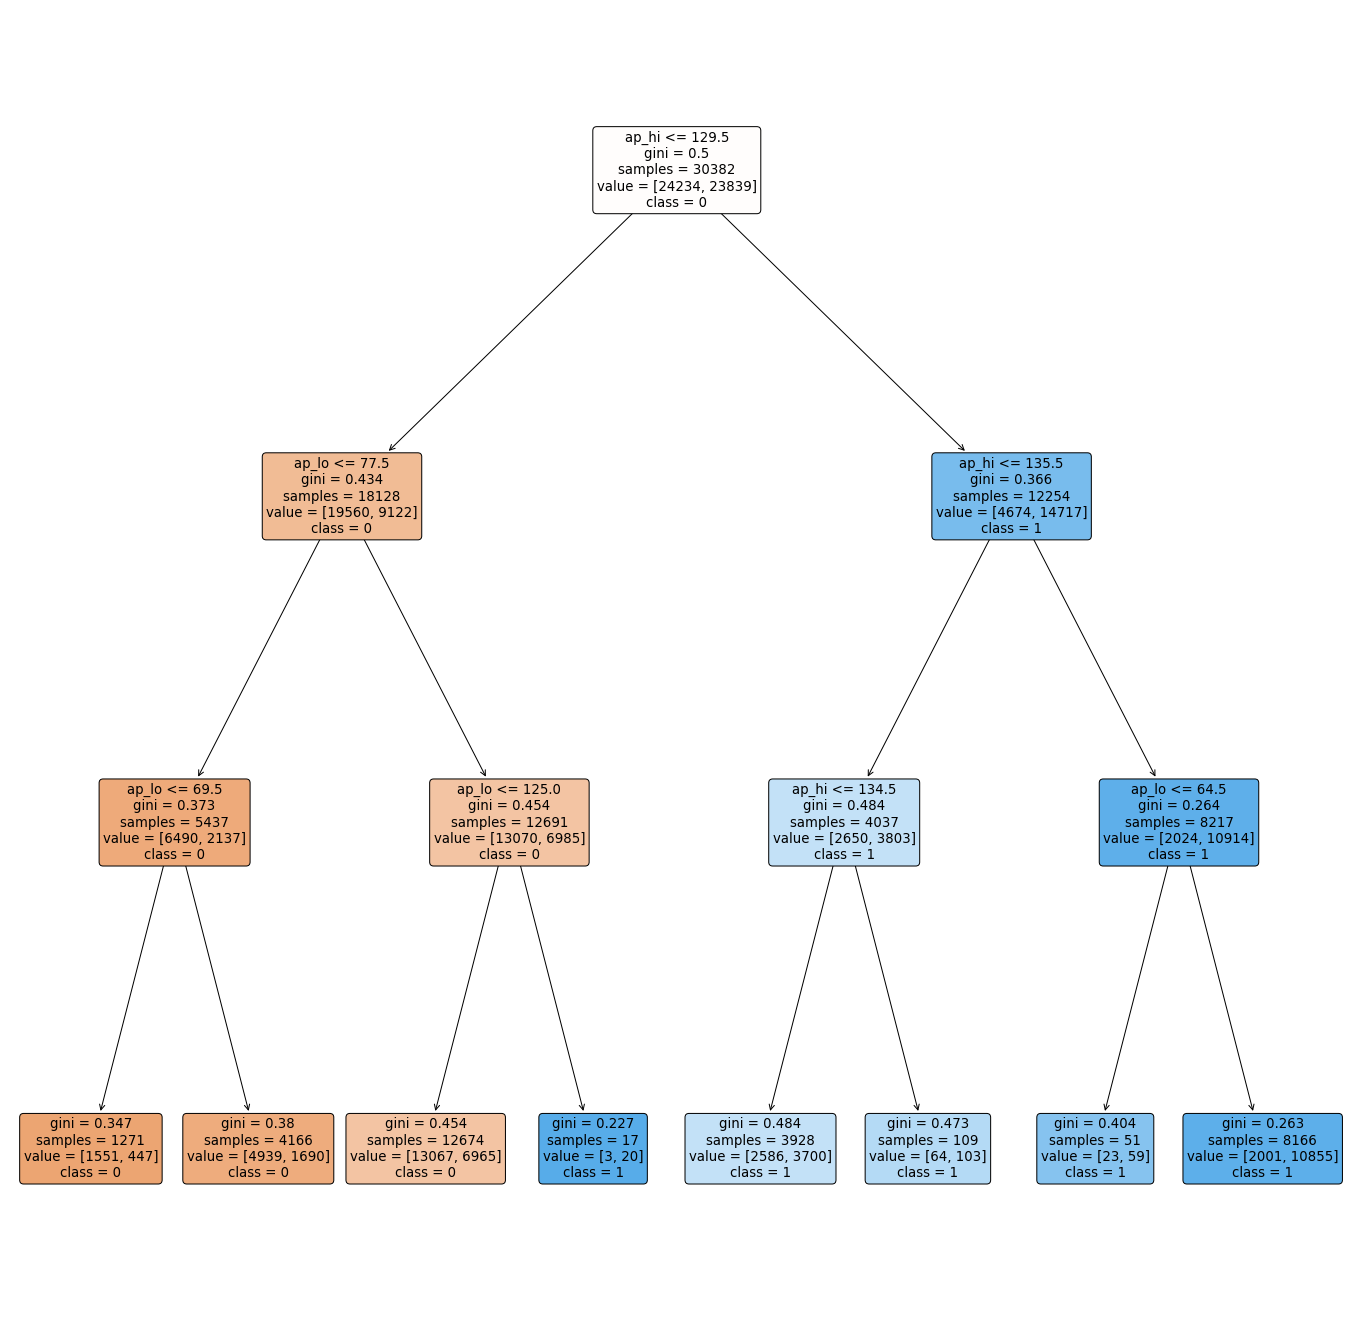

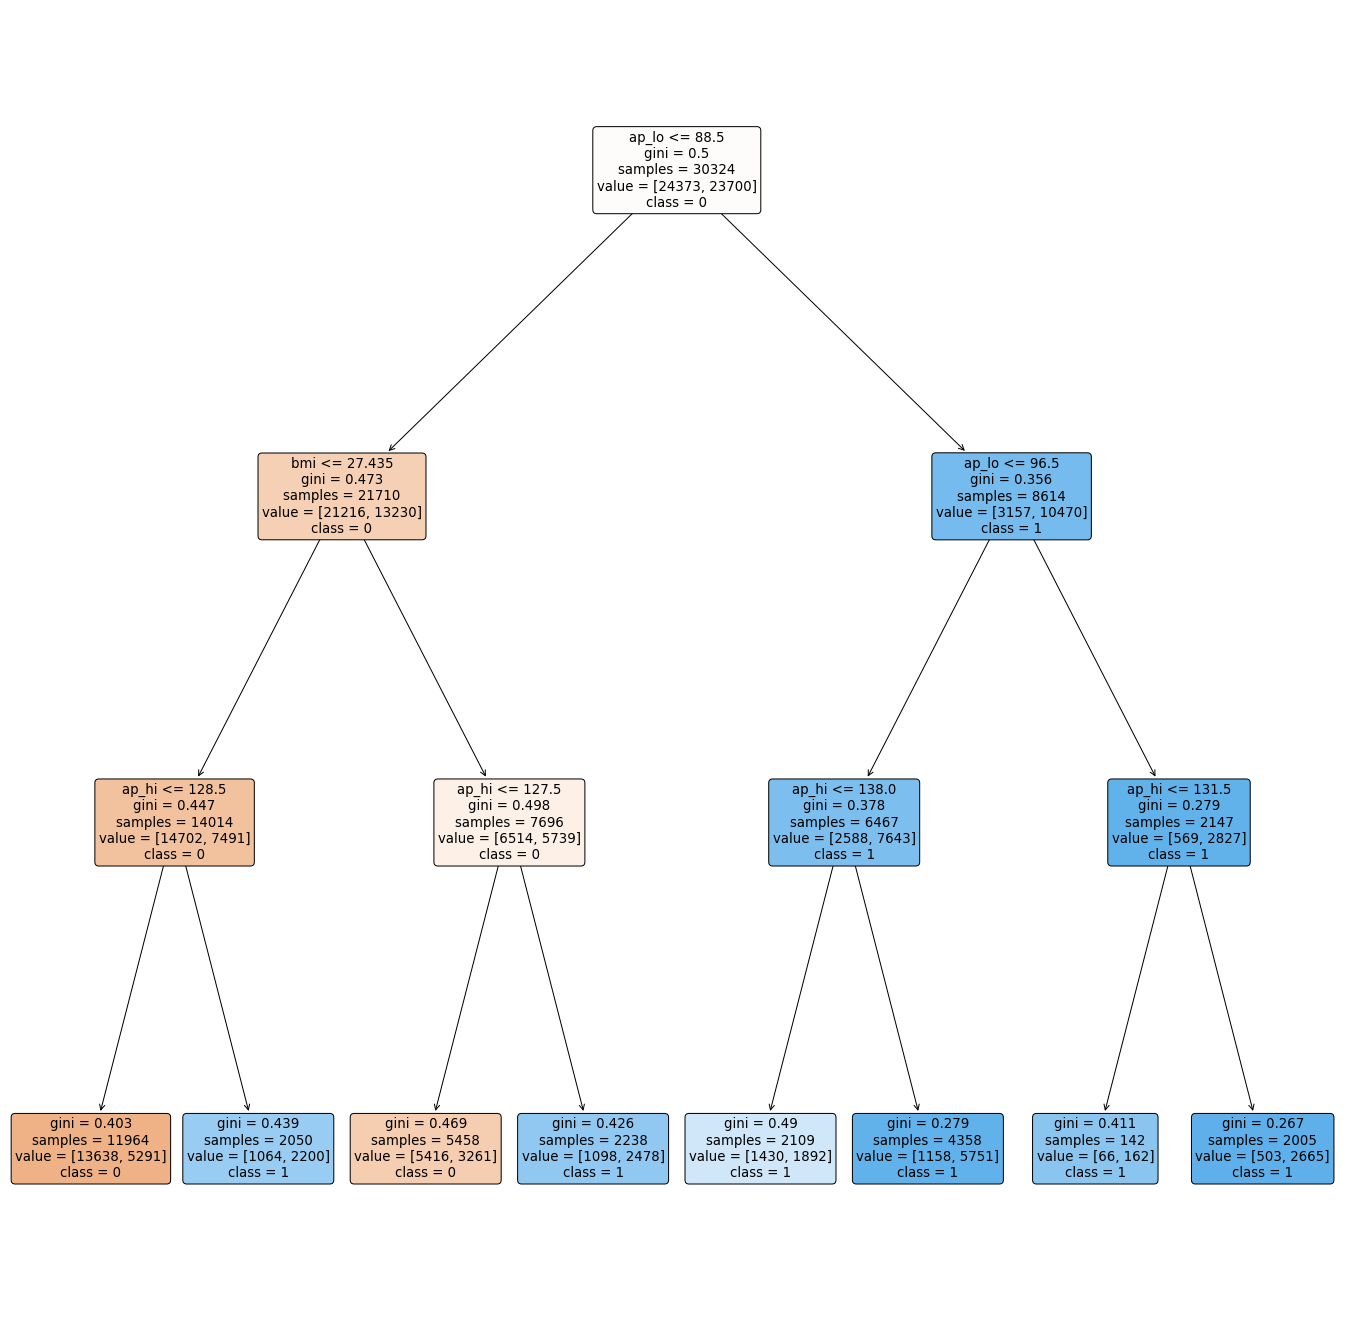

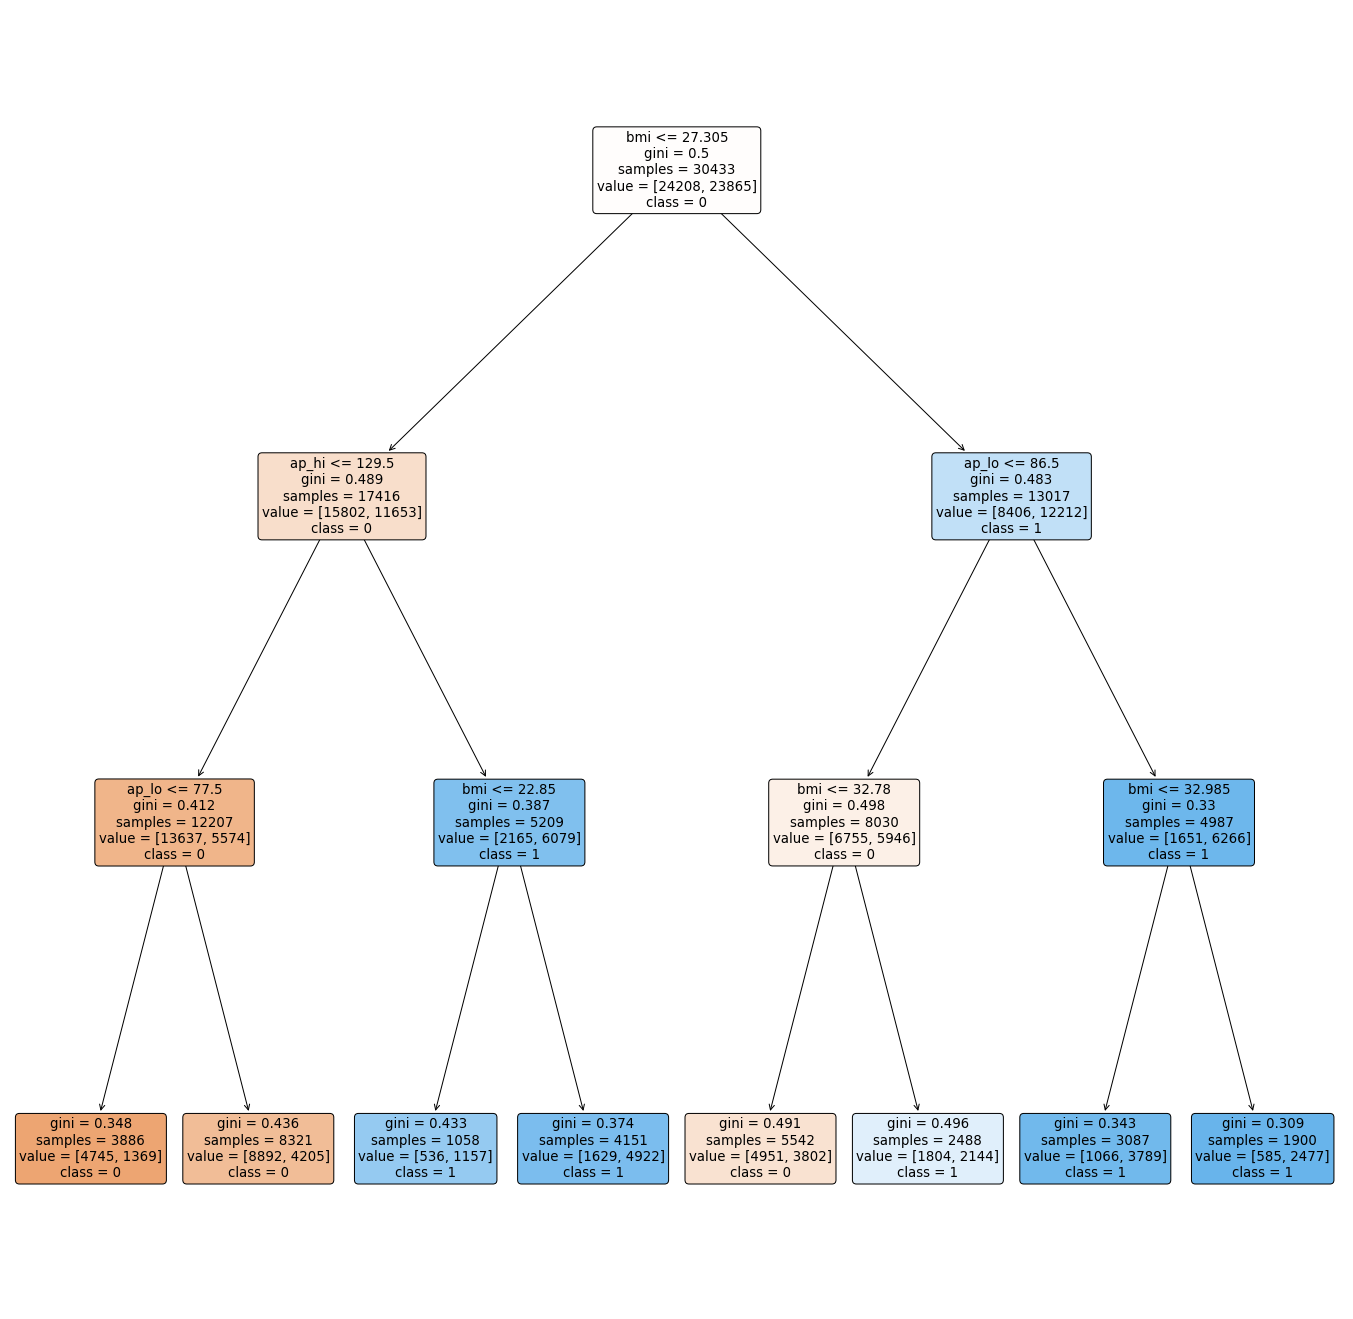

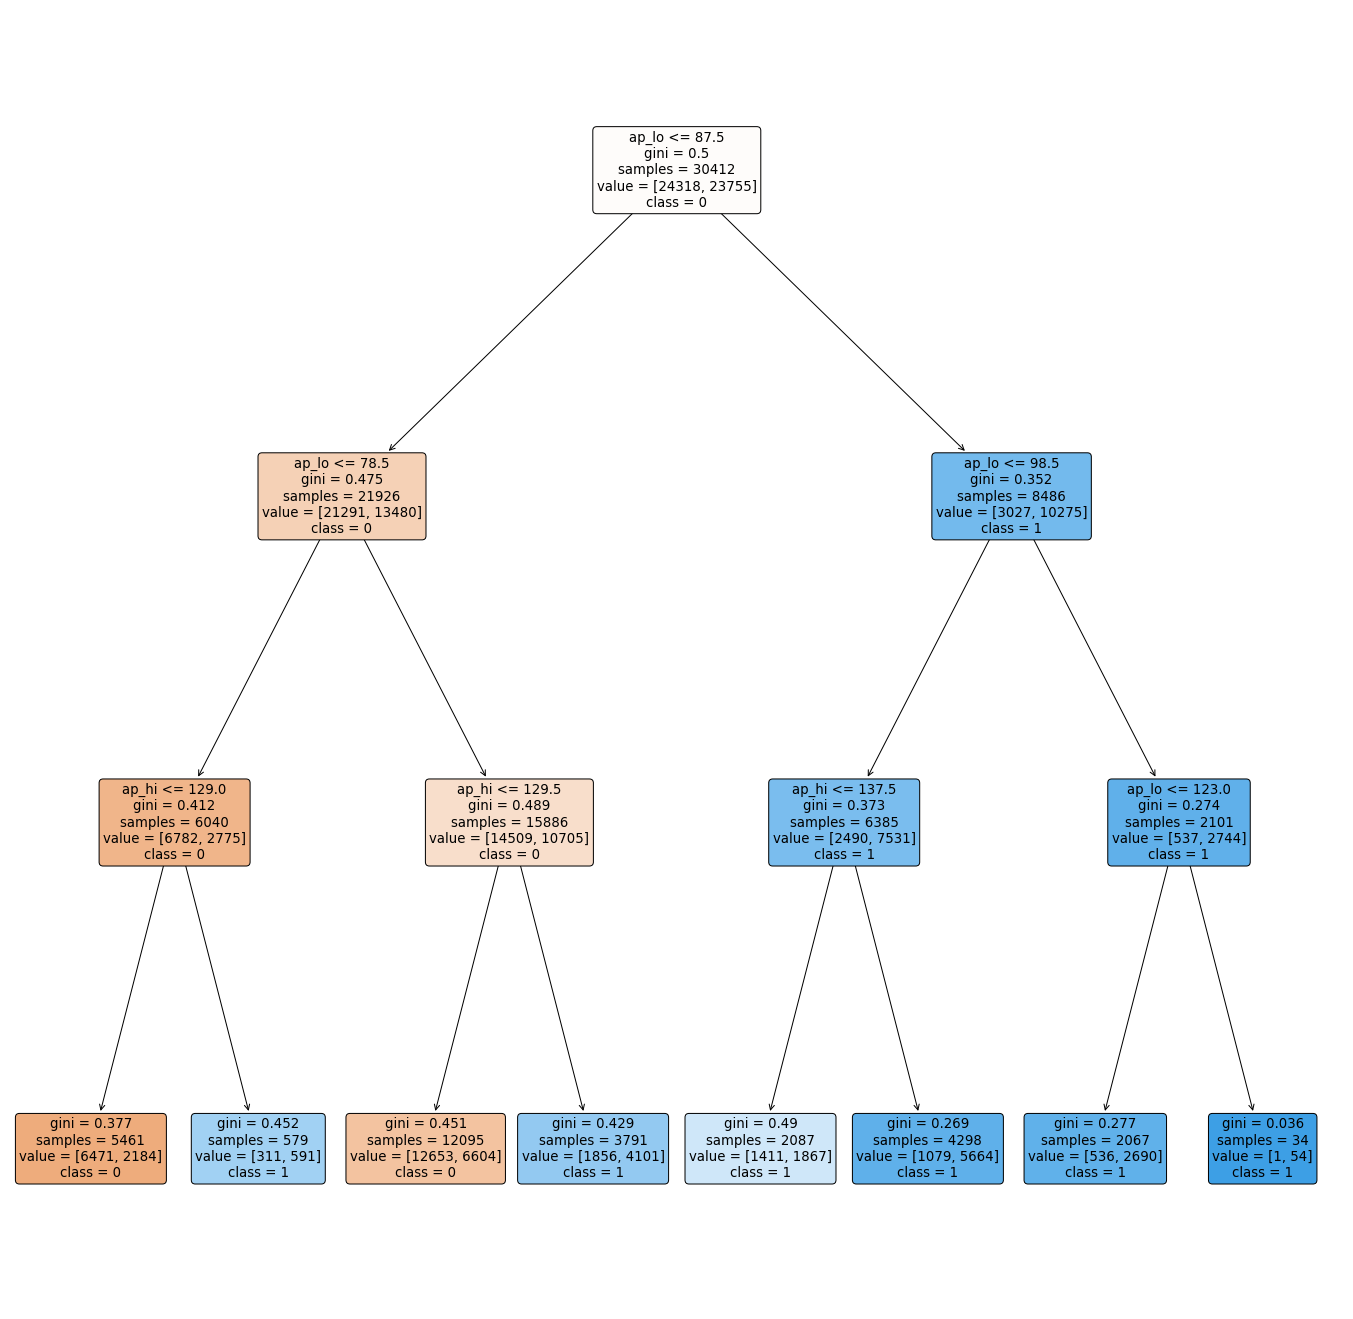

In [158]:
count = 0
for x in classifier.estimators_:
    f, axes = plt.subplots(1, 1, figsize=(24, 24))
    plot_tree(classifier.estimators_[count], 
              feature_names=X_train.columns,
              class_names=[str(x) for x in dectree.classes_], 
              filled=True, impurity=True, 
              rounded=True)
    count += 1
